In [10]:
from ecell4 import *
import numpy as np
import math
import sys
import os
#import matplotlib.pyplot as plt
#%matplotlib inline
rng = core.GSLRandomNumberGenerator()
def prerun(plist):
    output=[]
    for pid, p in plist:
            pos = tuple(p.position())
            output.append([pos[1],pos[2]])
    return output
phit = 0.55#float(sys.argv[1]) 
run = 1#int(sys.argv[2]) 
prun = 1#int(sys.argv[3]) 
print 'run',run,'prerun',prun
rm = 0.005
Dt = 1
dtfactor = 1e-1#5
tmol = (2*rm)**2 / (2*Dt)
finalt = math.log10(tmol*1000)
equit = math.log10(tmol*1e-4)#100)
Ap = math.pi*rm*rm
Nt = 100
At = Nt*Ap/phit
L = At**0.5
mat = Integer3(1,1,1)*int(L/2/rm)#max(3,int((Nall)**(1./2)))
print 'phit',Nt*Ap/At
simdt = math.log10(tmol*dtfactor)
#tt = np.logspace(simdt,finalt,int(abs(finalt-simdt))*5)
logt1 = np.logspace(simdt,finalt,int(abs(finalt-simdt))*7)
logt2 = np.logspace(simdt,equit,int(abs(equit-simdt))*7)
tt1 = np.concatenate(([0],logt1))
tt2 = np.concatenate(([0],logt2))
#plt.loglog(tt,tt,'.')
#a=(3.)**0.5
#b = math.sqrt(2.)
#poss = [[n[0]*rm,n[1]*rm] for n in [[1,1],[1+b,1+b],[1+2*b,1],[1,2*b+1],[1+2*b,1+2*b]]]
#poss = [[n[0]*rm,n[1]*rm] for n in [[1,1],[1+a,1+a],[1,1+2*a],[1+2*a,1],[1+2*a,1+2*a]]]
#filename = '/home/chew/runscript/phi'+str(phit)+'inipos.csv'

def singlerun(run,prun,tlog):
    dur = tlog[-1]
    if (prun!=1):
        filename = 'data/phi'+str(phit)+'inipos.csv'
        inipos = np.loadtxt(filename,delimiter=',')
        print 'loading from ',filename
    print 'L={},rm={},Dt={},tmol={:.2E},duration={},simdt={}'.format(L,rm,Dt,tmol,dur,tmol*dtfactor)
    rng.seed(run)
    w = egfrd.EGFRDWorld(Real3(L,L,L),matrix_sizes=mat,rng=rng)
    x,y,z = w.actual_lengths()
    with species_attributes():
         T | {'D':str(Dt),'radius':str(rm)}
    m=get_model()
    w.bind_to(m)
    print 'NT',Nt
    if (prun==1): #prerun 
        if (phit<=0.5): #dilute, place particle randomly
            for i in range(Nt): 
                while (True):
                    (pid,p),suc = w.new_particle(Species("T"),Real3(0,rng.uniform(0.0,L),rng.uniform(0.0,L)))
                    if (suc): break
        else: #dense, place particle in triangular lattice 

    else: #no prerun, start simulation
        for i in range(Nt): 
            pp = inipos[i]
            (pid,p),suc = w.new_particle(Species("T"),Real3(0,pp[0],pp[1]))    
    PID = [pid for pid, p in w.list_particles(Species("T"))] #particle IDs
    nt = len(PID)
    print'Nt',nt
    sim = egfrd.BDSimulator(w)
    sim.set_dt(tmol*dtfactor)
    sim.initialize()
    simdt = sim.dt()
    obs = TimingTrajectoryObserver(tlog,PID,True,tmol)
    #sim.run(dur,obs)
    viz.plot_world(w,radius=0.003)
    #viz.plot_trajectory(obs)  
    output = []
    if (prun==1):
        output=[]
        #output = prerun(w.list_particles(Species("T")))
    else:
        data=obs.data()
        for i in range(Nt):
            msd = np.array(
                [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
                     for pos in data[i]]) 
            if (i==0): MSD = msd
            else: MSD += msd    
        output = MSD/nt
    return output

if (prun==1):
	newpos = singlerun(run,prun,tt2)
	#filename = open('data/phi'+str(phit)+'inipos.csv','w')
	#np.savetxt(filename,newpos,delimiter=',',fmt='%s')
	#filename.close()
	#print 'saving to ',filename
else:
	msd = singlerun(run,prun,tt1)
	name = 'data/2DBDmocN900phi'+str(phit)+'run'+str(run)+'.csv'
	#filename = open(name,'w')
	#np.savetxt(filename,np.column_stack((tt1,msd)),delimiter=',',fmt='%s')
	#filename.close()
	#print 'saving to ',name
#outpos,msd = singlerun(run,inipos,tt[-1])
#outpos,msd = singlerun(run,[0],tt[-1])
#dirname = '/home/chew/runscript/data/BDmocphi'+str(phit)
#if not os.path.exists(dirname):
#    os.makedirs(dirname)
#name = dirname + '/phi'+str(phit)+'run'+str(run)+'.csv'


print newpos[:5]


run 1 prerun 1
phit 0.55
rglrpos 168
L=0.11949881425,rm=0.005,Dt=1,tmol=5.00E-05,duration=5e-09,simdt=5e-06
NT 100
fail [0.0, 0.03]
fail [0.0, 0.06]
fail [0.0, 0.08]
fail [0.0, 0.11]
fail [0.008660254037844387, 0.015]
fail [0.008660254037844387, 0.035]
fail [0.008660254037844387, 0.045]
fail [0.008660254037844387, 0.055]
fail [0.008660254037844387, 0.075]
fail [0.008660254037844387, 0.085]
fail [0.008660254037844387, 0.105]
fail [0.008660254037844387, 0.115]
fail [0.017320508075688773, 0.03]
fail [0.017320508075688773, 0.06]
fail [0.017320508075688773, 0.08]
fail [0.017320508075688773, 0.11]
fail [0.02598076211353316, 0.015]
fail [0.02598076211353316, 0.035]
fail [0.02598076211353316, 0.045]
fail [0.02598076211353316, 0.055]
fail [0.02598076211353316, 0.075]
fail [0.02598076211353316, 0.085]
fail [0.02598076211353316, 0.105]
fail [0.02598076211353316, 0.115]
fail [0.034641016151377546, 0.03]
fail [0.034641016151377546, 0.06]
fail [0.034641016151377546, 0.08]
fail [0.034641016151377546,

[]


In [17]:
#print outpos
newpos = outpos
filename = open('data/phi'+str(phit)+'inipos.csv','w')
np.savetxt(filename,newpos,delimiter=',',fmt='%s')
filename.close()

In [8]:
#correct periodic boundary effect for initial particle coordinates
import scipy.spatial.distance 
def correct(pos):    
    for i in range(5):
        for j in range(2):
            p = pos[i][j]
            while p<0:
                p=L+p
            while p>L:
                p = p-L
            pos[i][j]=p
    return pos

print 'L',L
print '2r',2*rm
new = list(inipos)
print new

            
#newpos= correct(new)
#print [[i[0],i[1]] for i in newpos]

L 0.0255831676987
2r 0.01
[array([ 0.00648236,  0.01921531]), array([ 0.01980643,  0.01285319]), array([ 0.00010845,  0.00459844]), array([ 0.01651991,  0.02243567]), array([ 0.01078112,  0.0057152 ])]


In [28]:
filename = 'data/phi'+str(phit)+'inipos.csv'
data = np.loadtxt(filename,delimiter=',')
for pos in data:
    print pos[0],pos[1]

0.0461237133741 0.0244638222635
0.0600590969435 0.00581607933513
0.00552482578862 0.0229914395209
0.0611852888404 0.0416782169861
0.0533268723588 0.0485376296049


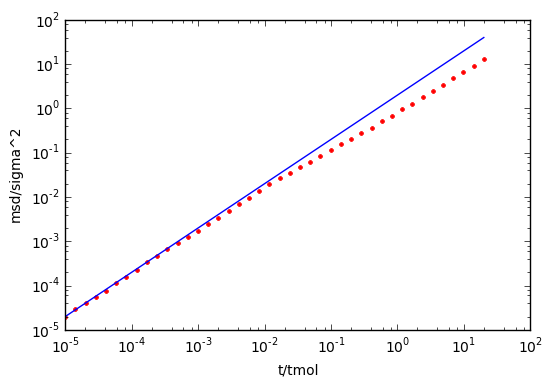

In [4]:
#tt= np.logspace(-10,-3,len(msd))
MSD1 = msd
tlog = tt1
sigma=2*0.005
sigma2=sigma**2
tmol=5e-5
import matplotlib.pyplot as plt
%matplotlib inline   
plt.loglog(tlog/tmol,MSD1/sigma2,'r.',label='1')
#plt.loglog(t/tmol,MSD2,'g--',label='2')
plt.plot(tlog/tmol,4.*Dt*np.array(tlog)/sigma2)
#plt.legend()
plt.xlabel('t/tmol')
plt.ylabel('msd/sigma^2')


0.341716021275


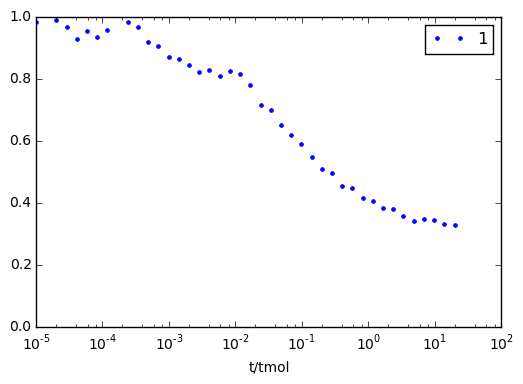

In [8]:
#dct2 = MSD2[1:]/tt[1:]/4./Dt
dct1 = MSD1[1:]/tlog[1:]/4./Dt
plt.semilogx(tlog[1:]/5e-5,dct1,'.',label='1')
#plt.semilogx(tt[1:],dct2,'g-',label='2')
plt.ylim(0,1.)
plt.legend()
print np.mean(dct1[(tlog>3*tmol)[1::]])
plt.xlabel('t/tmol')
#plt.ylabel('msd/sigma^2')
#plt.savefig("figure/2DBD_moc_N900_phi05.png",format='png',dpi=100)

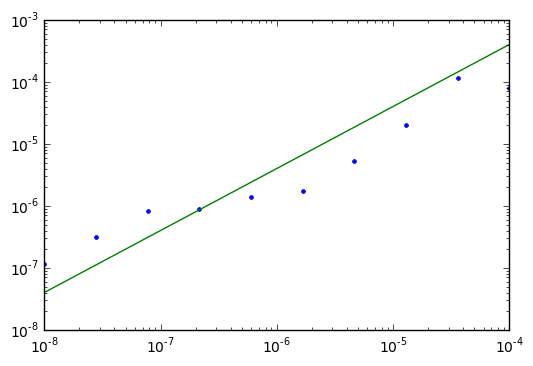

In [27]:
#viz.plot_trajectory(obs)   
MSD = msd
dct = MSD[1:]/tt[1:]/4./Dt
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(tt,MSD,'.')
plt.plot(tt,4.*Dt*np.array(tt))

In [39]:
norun = 1
for run in range(norun):
    msd = singlerun(run)
    if (run==0):
        MSD = msd
    else: 
        MSD+=msd
MSD /= norun

TypeError: 'float' object has no attribute '__getitem__'

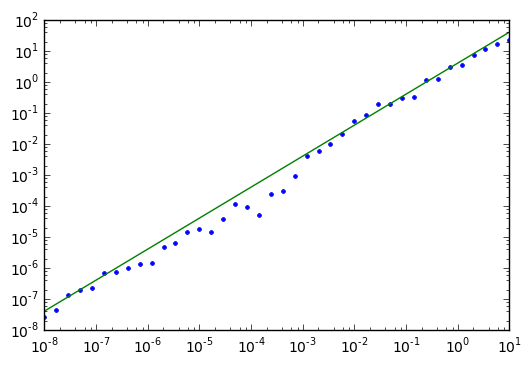

(0.2, 1.1)

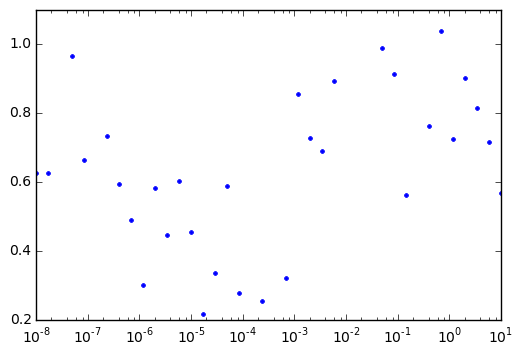

In [4]:
plt.semilogx(tt[1:],dct,'.')
plt.ylim(0.2,1.1)

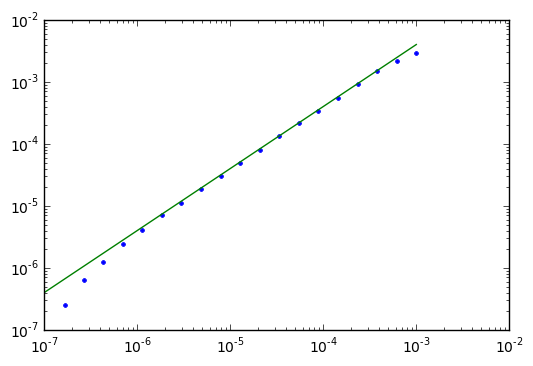

In [6]:
msd = MSD/norun
dct = msd[1:]/tt[1:]/4./Dt
import matplotlib.pyplot as plt
plt.loglog(tt,msd,'.')
#plt.semilogx(tt[1:],dct,'.')
plt.plot(tt,4.*Dt*np.array(tt))


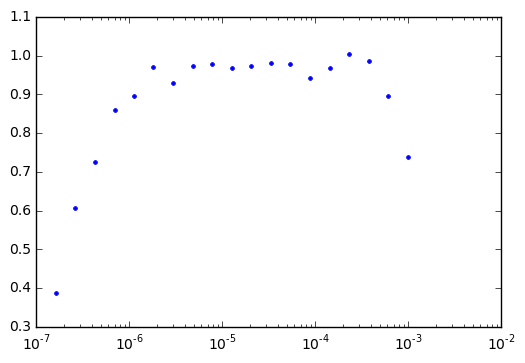

In [7]:
msd = MSD/norun
dct = msd[1:]/tt[1:]/4./Dt
import matplotlib.pyplot as plt
#plt.loglog(tt,msd,'.')
plt.semilogx(tt[1:],dct,'.')
#plt.plot(tt,4.*Dt*np.array(tt))

In [ ]:
data=obs.data()
leng = np.array(data).shape[1]
msd=np.zeros(leng,float) #zeros array for initiation of sum of squared displacement
for i in range(Nt):
     msd += np.array(
     [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
          for pos in data[i]]) 

msd = msd/Nt
t=np.arange(0,dur,simdt)
name = 'data/BDphi'+str(phio)+'/phi'+str(phio)+'run'+str(run)+'.csv'
filename = open(name,'w')
np.savetxt(filename,np.column_stack((t,msd)),delimiter=',',fmt='%s')
filename.close()
print 'saving to ',name

In [13]:
#M = max(3, int(min(cbrt(N), L / max(diameter))))
print Nall
print int((Nall)**(1./2))
print int(L/rm)

2303
47
200


In [15]:

Deff = msd[1:]/t[1:]/4/Dt
plt.plot(t,msd)
plt.plot(t,4*Dt*t,'g-')  #theoretical line
plt.xlabel("time")
plt.ylabel("msd")
plt.show()

In [3]:
plt.loglog(t[1:],Deff)
plt.xlabel("time")
plt.ylabel("D/Do")
print np.mean(Deff[-10:])
plt.show()

0.748632071987


In [9]:
#viz.plot_world(w)

In [7]:
print Deff[-10:]

[ 0.31446205  0.31451613  0.3146622   0.3142563   0.31506291  0.31394816
  0.31434592  0.31380255  0.31425508  0.31323333]


In [11]:
p = w.list_particles(Species("M"))

In [13]:
print len(p)+186+74611

186528


In [6]:
print tuple(Integer3(1,1,1)*3)

(3, 3, 3)


In [5]:
from ecell4 import *
import numpy as np
import math
import sys
import os
#import matplotlib.pyplot as plt
#%matplotlib inline
rng = core.GSLRandomNumberGenerator()

phit = float(sys.argv[1]) 
run = int(sys.argv[2]) 
prun = int(sys.argv[3]) 
Nt = int(sys.argv[4])
print 'run',run,'prerun?',prun
rm = 0.005
Dt = 1
dtfactor = 1e-5
tmol = (2*rm)**2 / (2*Dt)
finalt = math.log10(tmol*1000)
equit = math.log10(tmol*100)
Ap = math.pi*rm*rm
At = Nt*Ap/phit
L = At**0.5
mat = Integer3(1,1,1)*int(L/2/rm)#max(3,int((Nall)**(1./2)))
print 'phit',Nt*Ap/At
simdt = math.log10(tmol*dtfactor)
#tt = np.logspace(simdt,finalt,int(abs(finalt-simdt))*5)
logt1 = np.logspace(simdt,finalt,int(abs(finalt-simdt))*7)
logt2 = np.logspace(simdt,equit,int(abs(equit-simdt))*7)
tt1 = np.concatenate(([0],logt1))
tt2 = np.concatenate(([0],logt2))
#plt.loglog(tt,tt,'.')
#a=(3.)**0.5
#b = math.sqrt(2.)
#poss = [[n[0]*rm,n[1]*rm] for n in [[1,1],[1+b,1+b],[1+2*b,1],[1,2*b+1],[1+2*b,1+2*b]]]
#poss = [[n[0]*rm,n[1]*rm] for n in [[1,1],[1+a,1+a],[1,1+2*a],[1+2*a,1],[1+2*a,1+2*a]]]
#filename = '/home/chew/runscript/phi'+str(phit)+'inipos.csv'

def prerun(plist):
    output=[]
    for pid, p in plist:
            pos = tuple(p.position())
            output.append([pos[1],pos[2]])
    return output

def singlerun(run,prun,tlog):
    dur = tlog[-1]
    if (prun!=1):
        filename = '/home/chew/runscript/data/phi'+str(phit)+'inipos.csv'
        inipos = np.loadtxt(filename,delimiter=',')
        print 'loading from ',filename
    print 'L={},rm={},Dt={},tmol={:.2E},duration={},simdt={}'.format(L,rm,Dt,tmol,dur,tmol*dtfactor)
    rng.seed(run)
    w = egfrd.EGFRDWorld(Real3(L,L,L),matrix_sizes=mat,rng=rng)
    x,y,z = w.actual_lengths()
    with species_attributes():
         T | {'D':str(Dt),'radius':str(rm)}
    m=get_model()
    w.bind_to(m)
    for i in range(Nt):
         while(True):
            if (prun==1): 
                (pid,p),suc = w.new_particle(Species("T"),Real3(0,rng.uniform(0.0,L),rng.uniform(0.0,L)))
            else: 
                pp = inipos[i]
                (pid,p),suc = w.new_particle(Species("T"),Real3(0,pp[0],pp[1]))    
            if (suc): break
    PID = [pid for pid, p in w.list_particles(Species("T"))] #particle IDs
    nt = len(PID)
    print'Nt',nt
    sim = egfrd.BDSimulator(w)
    sim.set_dt(tmol*dtfactor)
    sim.initialize()
    simdt = sim.dt()
    #obs = FixedIntervalTrajectoryObserver(tmol,PID)
    obs = TimingTrajectoryObserver(tlog,PID,True,tmol)
    sim.run(dur,obs)
    #viz.plot_world(w,radius=0.003)
    #viz.plot_trajectory(obs)  
    output = []
    if (prun==1):
        output = prerun(w.list_particles(Species("T")))
    else:
        data=obs.data()
        for i in range(Nt):
            msd = np.array(
                [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
                     for pos in data[i]]) 
            if (i==0): MSD = msd
            else: MSD += msd    
        output = MSD/nt
    return output

if (prun==1):
	newpos = singlerun(run,prun,tt2)
	filename = open('/home/chew/runscript/data/phi'+str(phit)+'inipos.csv','w')
	np.savetxt(filename,newpos,delimiter=',',fmt='%s')
	filename.close()
	print 'saving to ',filename
else:
	msd = singlerun(run,prun,tt1)
    dirname = '/home/chew/runscript/data/BDmocN'+str(Nt)+'phi'+str(phit)
    if not os.path.exists(dirname):
        os.makedirs(dirname)
	name = dirname+'phi'+str(phit)+'run'+str(run)+'.csv'
	filename = open(name,'w')
	np.savetxt(filename,np.column_stack((tt1,msd)),delimiter=',',fmt='%s')
	filename.close()
	print 'saving to ',name

run 0
phit 0.1 Nt 5
41
L=0.0626657068658,rm=0.005,Dt=1,tmol=5.00E-05,duration=0.1,simdt=5e-10
